<a href="https://colab.research.google.com/github/d11541df/d11541df/blob/yongjin/%ED%95%9C%EA%B8%80%ED%98%95%ED%83%9C%EC%86%8C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x

In [ ]:
import sys


print(sys.version)

3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]


In [ ]:
  %%bash
  apt-get update
  apt-get install g++ openjdk-8-jdk python-dev python3-dev
  pip3 install JPype1
  pip3 install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading 

In [ ]:
import pandas as pd

import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

import nltk
from nltk import FreqDist
import numpy as np

import re
import regex

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [ ]:
#파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/csv file/complaint_folder/a.csv', encoding = 'utf-8')

In [ ]:
b = Kkma()
sentence = "안녕하세요 저는 용진입니다."
temp_X = b.nouns(sentence)
temp_X

TypeError: ignored

In [ ]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."
  
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


In [ ]:
stopwords=['뭐','으면','을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다''아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','수원시',
 '수원', '천만상상','파일','첨부','응모', '슬로건', '공모', '공모전', '응모전', '신청', '경우',
 '때문', '정도', '사항', '해당', '겁나다', '이것', '저것', '그것', '돋움', '신명', '태명', '한컴', '돋움',
 '동안', '거기', '저기', '여기', '대부분', '누구', '무엇', '고딕', '만큼', '굴림', '감사', '건지', '텐데',
 '안녕', '이번', '걸로', '수고', '겁니까', '그간', '그건', '그때', '글쓴이', '누가', '니다', '다면', '뭔가',
 '상상오아시스', '하다', '이다', '되다', '같다', '궁', '자체', '서체', '정', '서', '이', '을', '있다', '없다',
 '체', '관련', '생각', '현재','진행', '사람', '마음', '남산', '내용', '현실', '음', '막', '김', '변', '조', '오',
 '참', '동', '지금', '주변', '대상', '부분', '요즘', '하루', '마련', '세대', '시간', '이상', '행위', '활동',
 '구분', '사실', '과정', '모습', '기간', '선정', '단지', '자신', '발생', '지역', '기대', '마련', '장소',
 '모두', '부탁', '제공', '이용', '해주', '당시', '최근', '민원', '문제', '문제점', '현황', '개선', '방안',
 '문의', '답변', '일동', '요청', '담당자', '직원', '방법', '사용', '활용', '확인', '방식', '예전', '로','하','합니다']

tokenizer = Hannanum()
res = []
for sentence in df['내용']:
  tmp = []
  tmp = tokenizer.nouns(sentence)
  
  tokenized = []
  for token in tmp:
    if not token in stopwords:
      tokenized.append(token)

  res.append(tokenized)


vocab = FreqDist(np.hstack(res))
print('단어 [축구]의 빈도수는? ', vocab['축구'], '번')
vocab = vocab.most_common(50)
vocab


단어 [축구]의 빈도수는?  3 번


[('것', 706),
 ('수', 567),
 ('설치', 366),
 ('길', 362),
 ('시공사', 350),
 ('서수원', 302),
 ('구운역', 296),
 ('미래', 296),
 ('아파트', 212),
 ('입주예정자', 206),
 ('통학', 200),
 ('주민들', 195),
 ('입주', 184),
 ('곳', 168),
 ('음식물쓰레기', 165),
 ('변경', 158),
 ('앞', 152),
 ('발전', 150),
 ('희망', 148),
 ('관심', 148),
 ('구간', 148),
 ('고대', 148),
 ('바', 139),
 ('예정', 134),
 ('창호', 132),
 ('상황', 128),
 ('등', 128),
 ('제거', 121),
 ('내', 118),
 ('전', 114),
 ('매산초등학교', 114),
 ('보수', 113),
 ('제품', 110),
 ('신설', 106),
 ('계약', 105),
 ('아이들', 104),
 ('상태', 103),
 ('저', 101),
 ('통보', 101),
 ('힐스테이트', 100),
 ('80', 99),
 ('안전', 98),
 ('입주민', 98),
 ('나', 95),
 ('1.', 92),
 ('푸르지오', 91),
 ('변화', 90),
 ('처리', 89),
 ('사업', 89),
 ('근처', 88)]

In [ ]:
import string

In [ ]:
추가사항_매켑 = []
for j in range(len(df)):
  plus = []
  output_string = str(df['추가사항'][j]).translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = mecab.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      plus.append(token)
  추가사항_매켑.append(plus)

개선사항_매켑 = []
for j in range(len(df)):
  plus = []
  output_string = str(df['개선사항'][j]).translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = mecab.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
        
      plus.append(token)
  개선사항_매켑.append(plus)

In [ ]:
komoran = Komoran()

In [ ]:
추가사항_코모란 = []
for j in range(len(df)):
  plus = []
  output_string = str(df['추가사항'][j]).translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = komoran.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      plus.append(token)
  추가사항_코모란.append(plus)

개선사항_코모란 = []
for j in range(len(df)):
  plus = []
  output_string = str(df['개선사항'][j]).translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = komoran.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      plus.append(token)
  개선사항_코모란.append(plus)

In [ ]:
df['추가사항_매켑'] = 추가사항_매켑
df['개선사항_매켑'] = 개선사항_매켑
df['추가사항_코모란'] = 추가사항_코모란
df['개선사항_코모란'] = 개선사항_코모란






In [ ]:
df.to_csv('설문조사 komoran & mecab.csv',encoding = 'utf-8-sig')

In [ ]:
improvements1 = []
for j in range(len(a)):
  plus = []
  output_string = str(df['개선사항'][j]).translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  output_string = re.sub(r"[0-9]+", "", output_string)
  
  result = Mecab().pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      plus.append(token)
  improvements1.append(plus)

In [ ]:
improvements

In [ ]:


stopwords=['뭐','으면','을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다''아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','수원시',
 '수원', '천만상상','파일','첨부','응모', '슬로건', '공모', '공모전', '응모전', '신청', '경우',
 '때문', '정도', '사항', '해당', '겁나다', '이것', '저것', '그것', '돋움', '신명', '태명', '한컴', '돋움',
 '동안', '거기', '저기', '여기', '대부분', '누구', '무엇', '고딕', '만큼', '굴림', '감사', '건지', '텐데',
 '안녕', '이번', '걸로', '수고', '겁니까', '그간', '그건', '그때', '글쓴이', '누가', '니다', '다면', '뭔가',
 '상상오아시스', '하다', '이다', '되다', '같다', '궁', '자체', '서체', '정', '서', '이', '을', '있다', '없다',
 '체', '관련', '생각', '현재','진행', '사람', '마음', '남산', '내용', '현실', '음', '막', '김', '변', '조', '오',
 '참', '동', '지금', '주변', '대상', '부분', '요즘', '하루', '마련', '세대', '시간', '이상', '행위', '활동',
 '구분', '사실', '과정', '모습', '기간', '선정', '단지', '자신', '발생', '지역', '기대', '마련', '장소',
 '모두', '부탁', '제공', '이용', '해주', '당시', '최근', '민원', '문제', '문제점', '현황', '개선', '방안',
 '문의', '답변', '일동', '요청', '담당자', '직원', '방법', '사용', '활용', '확인', '방식', '예전', '로','하','합니다']

tokenizer = Mecab()
res = []
for sentence in a['개선사항']:
  tmp = []
  tmp = tokenizer.nouns(sentence)
  
  tokenized = []
  for token in tmp:
    if not token in stopwords:
      tokenized.append(token)

  shortword = re.compile(r'\W*\b\w{1}\b')
  shortword.sub('', tokenized)
  res.append(tokenized)

vocab = FreqDist(np.hstack(res))
print('단어 [축구]의 빈도수는? ', vocab['축구'], '번')

vocab = vocab.most_common(50)
vocab

In [ ]:
spume 거품 spume 거품

In [ ]:
a.drop(['Unnamed: 0','등록일'],axis = 1, inplace = True)
a.rename(columns = {'제목' : 'title', '내용': 'content', '담당부서' : 'department'}, inplace = True)

In [ ]:
a.head()

,title,content,department
0,건설정책과 공식 답변 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,건설과
1,제초작업 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,건설과
2,서수원의 낙후된 교통 혁명이 될 구운역 신설 하루빨리 현실화 되길 희망합니다,구운역 설치는 서수원의 더 큰 미래이자 희망합니다\n\n뜻이 있는 곳에 길이 있다는...,도시교통과
3,정자동 대유평공원 내 놀이터 그네 파손 복구요청,생긴지 한달밖에 안된 신생 놀이터의 그네 파손으로 인해 아이들이 위험하게 매달려 놀...,생태공원과
4,불법소각장 폐쇄해주세요!!!,불법노후소각장 폐쇄해주세요,청소자원과


In [ ]:
b.drop(['Unnamed: 0','time'],axis = 1, inplace = True)

In [ ]:
c.drop(['Unnamed: 0','time'],axis = 1, inplace = True)

In [ ]:
minwon = pd.concat([a,b,c],ignore_index = True).reset_index()

In [ ]:
minwon.drop(['index'],axis = 1, inplace = True)

In [ ]:
minwon

,title,content,department
0,건설정책과 공식 답변 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,건설과
1,제초작업 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,건설과
2,서수원의 낙후된 교통 혁명이 될 구운역 신설 하루빨리 현실화 되길 희망합니다,구운역 설치는 서수원의 더 큰 미래이자 희망합니다\n\n뜻이 있는 곳에 길이 있다는...,도시교통과
3,정자동 대유평공원 내 놀이터 그네 파손 복구요청,생긴지 한달밖에 안된 신생 놀이터의 그네 파손으로 인해 아이들이 위험하게 매달려 놀...,생태공원과
4,불법소각장 폐쇄해주세요!!!,불법노후소각장 폐쇄해주세요,청소자원과
...,...,...,...
3742,코로나19 검사시 미취학아동,안녕하세요. 6세4세 아이를 키우고 있는 엄마입니다.\n요즘 감기나 아이들 원에서 ...,팔달구보건소보건행정과
3743,화서역우방센트럴파크 단지 일대 보도블럭 정비 요청,수원시 장안구 정자동 화서역우방센트럴파크 아파트 주변 보도블럭이 노후되고 일부 구간...,장안구건설과
3744,코로나 백신접종 혜택 종료,수원시청 홈페이지 코로나19메뉴에 수원시민 코로나 백신접종 혜택이 대부분 12월 3...,자치분권과
3745,수원 정자1동 빌라건물 안전 문제,안녕하세요 수원 정자동에 거주하는 시민입니다\n다름아니라 현재 살고있는 옆건물 중간...,장안구건축과


In [ ]:
def get_counts(seq): 
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
import pandas as pd
from tqdm import tqdm
import string
import re

import konlpy
from konlpy.tag import Hannanum
from konlpy.utils import pprint
hannanum = Hannanum()

result = hannanum.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^')

In [ ]:
import string

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv file/국민신문고+시장님보세요_정수기_제거.txt',encoding = 'utf-8', index_col = 0)

In [ ]:
a = pd.read_csv(file_list[0], encoding='utf-8-sig')
b = pd.read_csv(file_list[1], encoding='utf-8-sig')
c = pd.read_csv(file_list[2], encoding='utf-8-sig')

In [ ]:
df.head()

,등록일,제목,내용,담당부서
0,2021-10-07,건설정책과 공식 답변 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,건설과
1,2021-10-07,제초작업 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,건설과
2,2021-10-07,정자동 대유평공원 내 놀이터 그네 파손 복구요청,생긴지 한달밖에 안된 신생 놀이터의 그네 파손으로 인해 아이들이 위험하게 매달려 놀...,생태공원과
3,2021-10-07,불법소각장 폐쇄해주세요!!!,불법노후소각장 폐쇄해주세요,청소자원과
4,2021-10-07,오현초 이비가(하이웨이)등하교길이 위험해요,육교설치를 해주던지 공간이 안나온다는 말만 하면 어쩌나요? 왜 우리애들은 위험한 길...,건설과


In [ ]:
df['등록일'] = pd.to_datetime(df['등록일'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [ ]:
df['등록일_year'] = df['등록일'].dt.year        
df['등록일_month'] = df['등록일'].dt.month 

In [ ]:
df.drop(['등록일'],axis = 1, inplace = True)

In [ ]:
df['등록일_year'] = df['등록일_year'].astype(str)
df['등록일_month'] = df['등록일_month'].astype(str)

In [ ]:
df['등록일_date'] = df['등록일_year'] + df['등록일_month']

In [ ]:
df.drop(['등록일_year','등록일_month'], axis =1, inplace = True)

In [ ]:
df['등록일_date'].unique()

array(['202110', '202111', '202112', '20221', '20222', '20223', '20224',
       '20225', '20226', '20227', '20228', '20229'], dtype=object)

In [ ]:
minwon_1 = df[df['등록일_date'].isin(['202110','202111','202112'])]
minwon_2 = df[df['등록일_date'].isin(['20221','20222','20223'])]
minwon_3 = df[df['등록일_date'].isin(['20224','20225','20226'])]
minwon_4 = df[df['등록일_date'].isin(['20227','20228','20229'])]


minwon_1 = minwon_1.reset_index(drop=True)
minwon_2 = minwon_2.reset_index(drop=True)
minwon_3 = minwon_3.reset_index(drop=True)
minwon_4 = minwon_4.reset_index(drop=True)

In [ ]:
stopwords = pd.read_excel('/content/drive/MyDrive/csv file/complaint_folder/stopwords.xlsx', header = None, names =['stopword'])
stopword = stopwords['stopword'].values.tolist()
stopword.append('80')
stopword.append('23')
stopword.append('232752337')

In [ ]:
%%bash
python3 -c "import jpype; jpype.startJVM(convertStrings=True); print(jpype.isJVMStarted())"

True


In [ ]:
import tqdm

In [ ]:
ptdf = []

for j in range(len(minwon_1)):
  output_string = minwon_1['내용'][j].translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = hannanum.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      ptdf.append(token)

stopword = stopwords['stopword'].values.tolist()
stopword.append('80')
stopword.append('23')
stopword.append('232752337')
stopword.append('운역')

preprocessing = []

for w in ptdf:
  if w not in stopword:
    preprocessing.append(w)


vocab = list(set(preprocessing))
vocab.sort()

def tf(t, d):
    return d.count(t)
    
N = len(minwon_1)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_1['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

tf_.sum().sort_values(ascending=False)[:50]

from math import log


def idf(t):
    df = 0
    for doc in minwon_1['내용']:
        df += t in doc
    return log(N/(df + 1))


result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_.sort_values(by='IDF', ascending=False)

def tf(t, d):
    return d.count(t)
    
N = len(minwon_1)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_1['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

def tfidf(t, d):
    return tf(t,d)* idf(t)

result = []
for i in tqdm.tqdm(range(N)):
    result.append([])
    d = minwon_1['내용'][i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_1 = pd.DataFrame(result, columns = vocab)
df_2110_2112 = tfidf_1.sum().sort_values(ascending=False)[:50].to_frame()

100%|██████████| 961/961 [2:03:25<00:00,  7.71s/it]


In [ ]:
ptdf = []

for j in range(len(minwon_2)):
  output_string = minwon_2['내용'][j].translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = hannanum.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      ptdf.append(token)

stopword = stopwords['stopword'].values.tolist()
stopword.append('80')
stopword.append('23')
stopword.append('232752337')
stopword.append('운역')

preprocessing = []

for w in ptdf:
  if w not in stopword:
    preprocessing.append(w)


vocab = list(set(preprocessing))
vocab.sort()

def tf(t, d):
    return d.count(t)
    
N = len(minwon_2)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_2['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

tf_.sum().sort_values(ascending=False)[:50]

from math import log


def idf(t):
    df = 0
    for doc in minwon_2['내용']:
        df += t in doc
    return log(N/(df + 1))


result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_.sort_values(by='IDF', ascending=False)

def tf(t, d):
    return d.count(t)
    
N = len(minwon_2)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_2['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

def tfidf(t, d):
    return tf(t,d)* idf(t)

result = []
for i in tqdm.tqdm(range(N)):
    result.append([])
    d = minwon_2['내용'][i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_2 = pd.DataFrame(result, columns = vocab)
df_2201_2203 = tfidf_2.sum().sort_values(ascending=False)[:50].to_frame()

100%|██████████| 491/491 [25:10<00:00,  3.08s/it]


In [ ]:
ptdf = []

for j in range(len(minwon_3)):
  output_string = minwon_3['내용'][j].translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = hannanum.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      ptdf.append(token)

stopword = stopwords['stopword'].values.tolist()
stopword.append('80')
stopword.append('23')
stopword.append('232752337')
stopword.append('운역')

preprocessing = []

for w in ptdf:
  if w not in stopword:
    preprocessing.append(w)


vocab = list(set(preprocessing))
vocab.sort()

def tf(t, d):
    return d.count(t)
    
N = len(minwon_3)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_3['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

tf_.sum().sort_values(ascending=False)[:50]

from math import log


def idf(t):
    df = 0
    for doc in minwon_3['내용']:
        df += t in doc
    return log(N/(df + 1))


result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_.sort_values(by='IDF', ascending=False)

def tf(t, d):
    return d.count(t)
    
N = len(minwon_3)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_3['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

def tfidf(t, d):
    return tf(t,d)* idf(t)

result = []
for i in tqdm.tqdm(range(N)):
    result.append([])
    d = minwon_3['내용'][i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_3 = pd.DataFrame(result, columns = vocab)
df_2204_2206 = tfidf_3.sum().sort_values(ascending=False)[:50].to_frame()

100%|██████████| 308/308 [03:26<00:00,  1.49it/s]


In [ ]:
ptdf = []

for j in range(len(minwon_4)):
  output_string = minwon_4['내용'][j].translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = hannanum.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      ptdf.append(token)

stopword = stopwords['stopword'].values.tolist()
stopword.append('80')
stopword.append('23')
stopword.append('232752337')
stopword.append('운역')

preprocessing = []

for w in ptdf:
  if w not in stopword:
    preprocessing.append(w)


vocab = list(set(preprocessing))
vocab.sort()

def tf(t, d):
    return d.count(t)
    
N = len(minwon_4)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_4['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

tf_.sum().sort_values(ascending=False)[:50]

from math import log


def idf(t):
    df = 0
    for doc in minwon_4['내용']:
        df += t in doc
    return log(N/(df + 1))


result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_.sort_values(by='IDF', ascending=False)

def tf(t, d):
    return d.count(t)
    
N = len(minwon_4)

result = []
for i in tqdm.tqdm(range(N)): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = minwon_4['내용'][i]
    
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)

def tfidf(t, d):
    return tf(t,d)* idf(t)

result = []
for i in tqdm.tqdm(range(N)):
    result.append([])
    d = minwon_4['내용'][i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_3 = pd.DataFrame(result, columns = vocab)
df_2207_2209 = tfidf_3.sum().sort_values(ascending=False)[:50].to_frame()

100%|██████████| 458/458 [10:57<00:00,  1.44s/it]


In [ ]:
print(df_2110_2112.shape)
print(df_2201_2203.shape)
print(df_2204_2206.shape)
print(df_2207_2209.shape)

(50, 1)
(50, 1)
(50, 1)
(50, 1)


In [ ]:
df_2110_2112.to_csv('df_2110_2112.csv', encoding = 'utf-8-sig')
df_2201_2203.to_csv('df_2201_2203.csv', encoding = 'utf-8-sig')
df_2204_2206.to_csv('df_2204_2206.csv', encoding = 'utf-8-sig')
df_2207_2209.to_csv('df_2207_2209.csv', encoding = 'utf-8-sig')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
import seaborn as sns

NameError: ignored

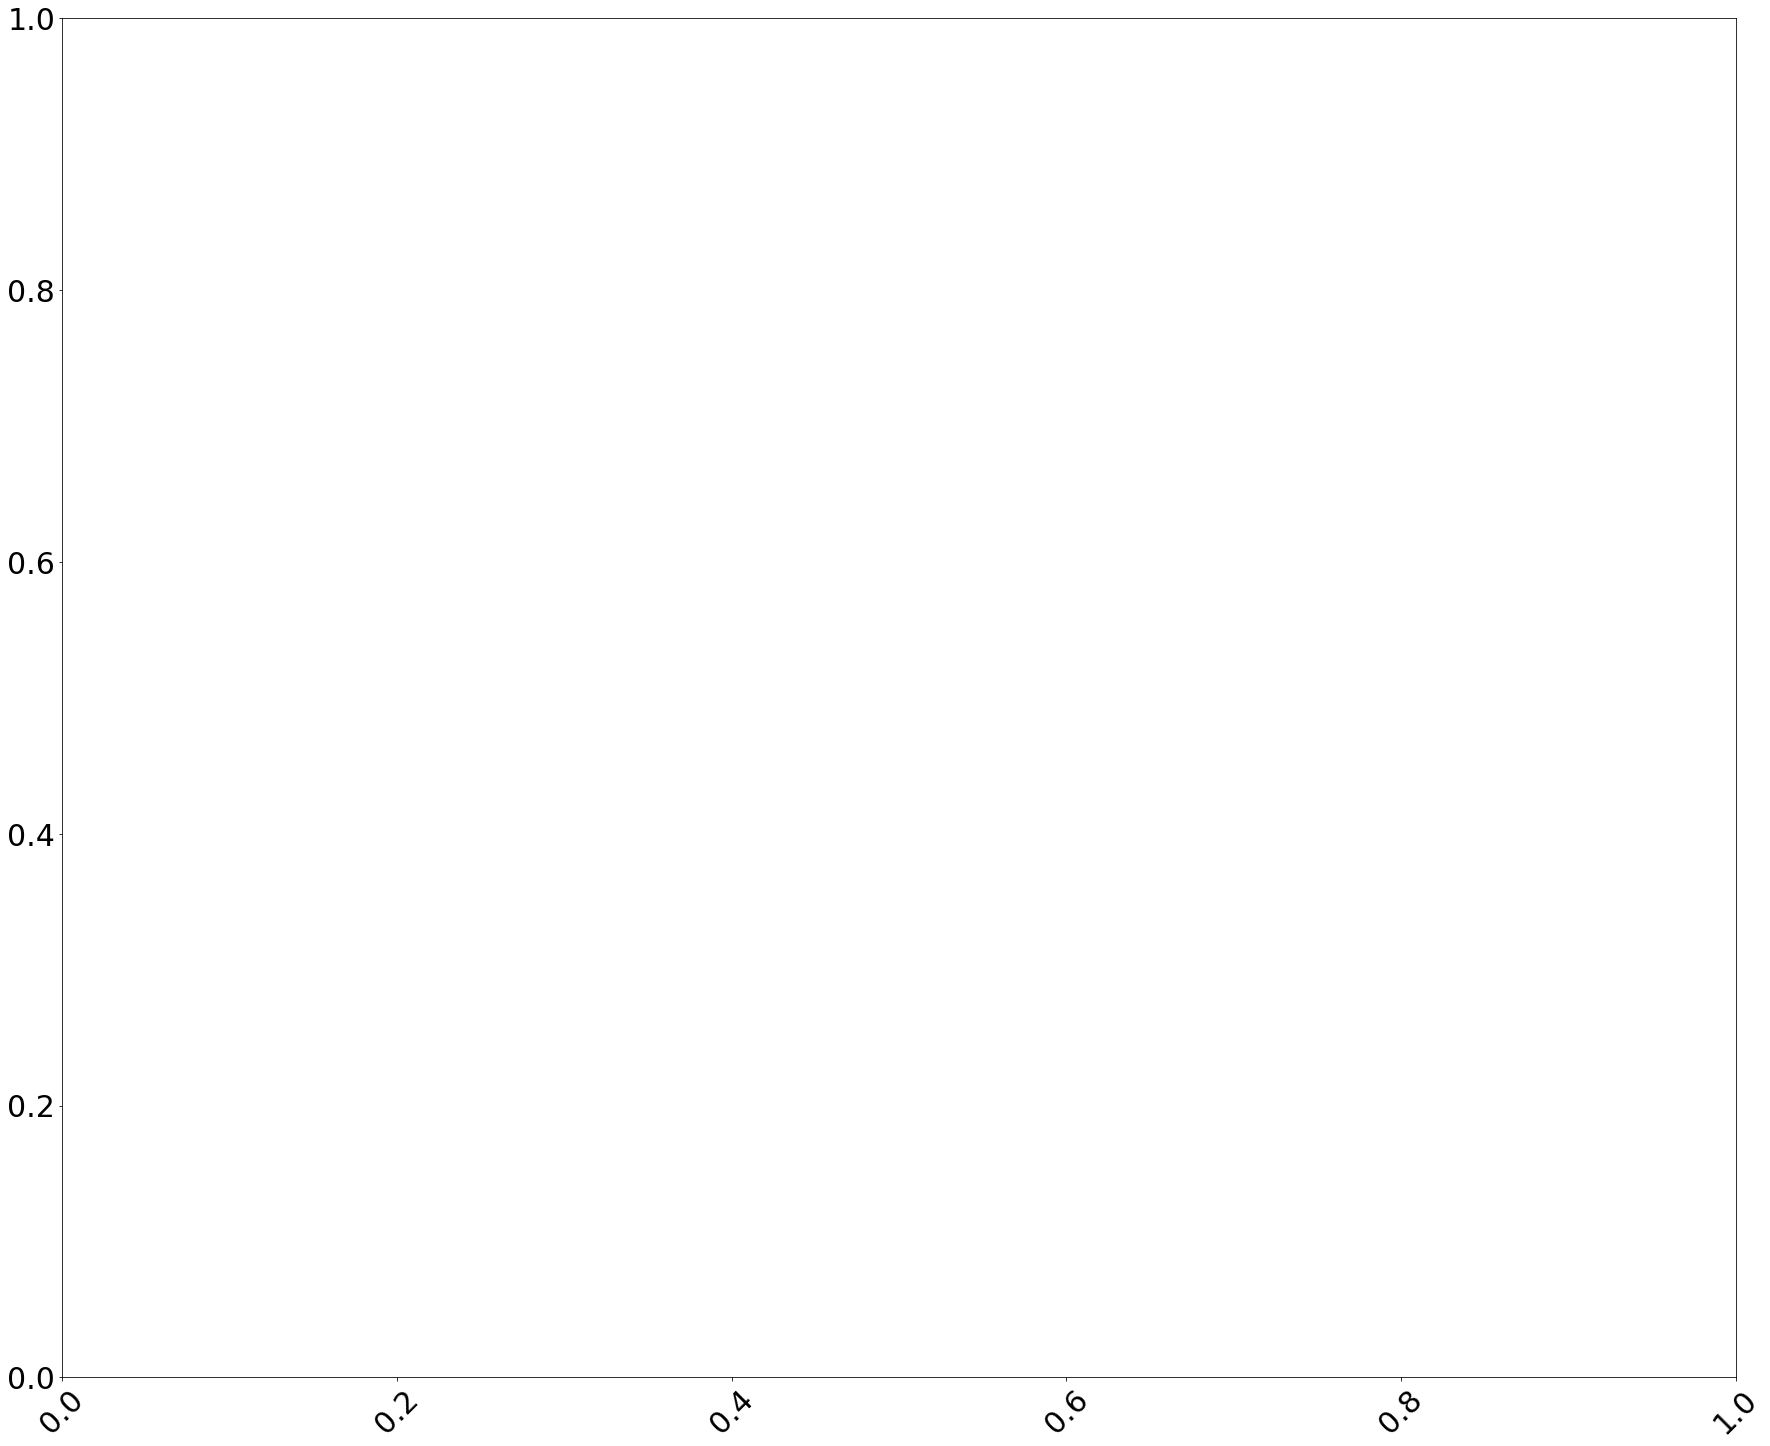

In [ ]:
plt.figure(figsize=(30,25))  
plt.rc('font', size=40)
plt.rc('axes', labelsize=30)  
plt.rc('xtick', labelsize=30)  
plt.rc('ytick', labelsize=30) 
plt.xticks(rotation = 45 )
g = sns.barplot(data=df_도시교통과, x=민원종류, y=가중치)

ax = g

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)

plt.xlabel('민원')
plt.ylabel('가중치')

 

plt.show()

# plt.savefig('가맹점수.png', dpi=300)

In [ ]:
fontprop = fm.FontProperties(fname='NanumGothic', size=18)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_1)):
    plt.annotate(s=tfidf_1[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()

NameError: ignored

In [ ]:
df_title = pd.concat([df1['제목'], df2['title'],df3['title'],df4['제목'],df5['제목'],df6['제목']], ignore_index = True)
df_contents = pd.concat([df1['내용'], df2['content'],df3['content'],df4['내용'],df5['내용'],df6['내용']], ignore_index = True)
# df_title = pd.concat([df1['제목'], df2['title'],df3['title'],df4['제목'],df6['제목'],df6['제목']], ignore_index = True)

In [ ]:
mixed_df_title = df_title.to_frame(name='title')
mixed_df_contents = df_contents.to_frame(name='contents')

In [ ]:
# mixed_df_title.to_csv('mixed_df_title.csv', encoding = 'utf-8-sig')
# mixed_df_contents.to_csv('mixed_df_contents.csv', encoding = 'utf-8-sig')

In [ ]:
mixed_df_title['title'] = mixed_df_title['title'].str.replace("\n"," ")
mixed_df_title['title'] = mixed_df_title['title'].str.replace("\r"," ")

mixed_df_contents['contents'] = mixed_df_contents['contents'].str.replace("\n"," ")
mixed_df_contents['contents'] = mixed_df_contents['contents'].str.replace("\r"," ")

In [ ]:
df_all = pd.concat([mixed_df_title['title'],mixed_df_contents['contents']], axis = 0, ignore_index = True)

In [ ]:
df_all = df_all.to_frame(name = 'needs')

In [ ]:
df_all

,needs
0,건설정책과 공식 답변 요청
1,제초작업 요청
2,서수원의 낙후된 교통 혁명이 될 구운역 신설 하루빨리 현실화 되길 희망합니다
3,정자동 대유평공원 내 놀이터 그네 파손 복구요청
4,불법소각장 폐쇄해주세요!!!
...,...
8295,보육서비스 질 향상을 위한 정책 제언 안녕하세요 우리 시 보육아동과에서는 보육서...
8296,"안녕하세요 수원시민 여러분 ""젊음과 문화, Smart 영통!"" 영통에 이사를 ..."
8297,지방자치분권 및 수원시 지방행정 발전를 위한 일반시민 회의 및 자유토론 을 참여코져...
8298,우리 시에서는 2022.1.13. 수원특례시 출범에 맞춰 기존 시민헌장(2009.6...


In [ ]:
stopwords = pd.read_xlsx('/content/drive/MyDrive/csv file/complaint_folder/stopwords (1).xlsx', encoding = 'cp949')

AttributeError: ignored

In [ ]:
stopwords=['뭐','으면','을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한',
           '하다''아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','수원시',
 '수원', '천만상상','파일','첨부','응모', '슬로건', '공모', '공모전', '응모전', '신청', '경우',
 '때문', '정도', '사항', '해당', '겁나다', '이것', '저것', '그것', '돋움', '신명', '태명', '한컴', '돋움',
 '동안', '거기', '저기', '여기', '대부분', '누구', '무엇', '고딕', '만큼', '굴림', '감사', '건지', '텐데',
 '안녕', '이번', '걸로', '수고', '겁니까', '그간', '그건', '그때', '글쓴이', '누가', '니다', '다면', '뭔가',
 '상상오아시스', '하다', '이다', '되다', '같다', '궁', '자체', '서체', '정', '서', '이', '을', '있다', '없다',
 '체', '관련', '생각', '현재','진행', '사람', '마음', '남산', '내용', '현실', '음', '막', '김', '변', '조', '오',
 '참', '동', '지금', '주변', '대상', '부분', '요즘', '하루', '마련', '세대', '시간', '이상', '행위', '활동',
 '구분', '사실', '과정', '모습', '기간', '선정', '단지', '자신', '발생', '지역', '기대', '마련', '장소',
 '모두', '부탁', '제공', '이용', '해주', '당시', '최근', '민원', '문제', '문제점', '현황', '개선', '방안',
 '문의', '답변', '일동', '요청', '담당자', '직원', '방법', '사용', '활용', '확인', '방식', '예전', '로','하','합니다']

hannanum = Hannanum()
res = []
for i in df_title['needs']:
  tmp = []
  tmp = hannanum.nouns(i)
  
  tokenized = []
  for token in tmp:
    if not token in stopwords:
      tokenized.append(token)

  res.append(tokenized)

vocab = FreqDist(np.hstack(res))
print('단어 [교통]의 빈도수는? ', vocab['시장'], '번')

vocab = vocab.most_common(100)
vocab

df_all = pd.DataFrame(vocab, columns = ['complaint_counts', 'num'])

단어 [교통]의 빈도수는?  282 번


In [ ]:
df1

,Unnamed: 0,제목,내용,등록일,담당부서
0,0,건설정책과 공식 답변 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,2021-10-07,건설과
1,1,제초작업 요청,첨부한 지도에 표시한 광교마을로 156 부근 인도 위에 자라난 잡초 제초작업 및 번...,2021-10-07,건설과
2,2,서수원의 낙후된 교통 혁명이 될 구운역 신설 하루빨리 현실화 되길 희망합니다,구운역 설치는 서수원의 더 큰 미래이자 희망합니다\n\n뜻이 있는 곳에 길이 있다는...,2021-10-07,도시교통과
3,3,정자동 대유평공원 내 놀이터 그네 파손 복구요청,생긴지 한달밖에 안된 신생 놀이터의 그네 파손으로 인해 아이들이 위험하게 매달려 놀...,2021-10-07,생태공원과
4,4,불법소각장 폐쇄해주세요!!!,불법노후소각장 폐쇄해주세요,2021-10-07,청소자원과
...,...,...,...,...,...
1424,1424,고등동 운동시설 확대 요청,안녕하세요.\n최근에 수원 고등동으로 이사와서 근처 농구장을 찾고 있는데 고등동 근...,2022-09-28,체육진흥과
1425,1425,수원 한일타운 출근시간 7770버스 배차 문제,7월 6일부터 입석탑승을 금지해서 잔여좌석이 0석인 버스는 그냥 보내줄 수밖에 없습...,2022-09-28,대중교통과
1426,1426,인도는 공사중이고 시민은 차도로 내몰고,국민은행 옆 작은 식당을 리모델링중인가공사중인데 인도 공사한다고 그 앞 인도를 다 ...,2022-09-28,건설과
1427,1427,도로막고 공사하는 모습입니다,원천동 아주대앞 골목길에서 공사하는 모습입니다.\n이게 말이 됩니까?\n분진은 또 ...,2022-09-30,건설과


In [ ]:
mecab= Mecab()

In [ ]:
stopwords=['뭐','으면','을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한',
           '하다''아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','수원시',
 '수원', '천만상상','파일','첨부','응모', '슬로건', '공모', '공모전', '응모전', '신청', '경우',
 '때문', '정도', '사항', '해당', '겁나다', '이것', '저것', '그것', '돋움', '신명', '태명', '한컴', '돋움',
 '동안', '거기', '저기', '여기', '대부분', '누구', '무엇', '고딕', '만큼', '굴림', '감사', '건지', '텐데',
 '안녕', '이번', '걸로', '수고', '겁니까', '그간', '그건', '그때', '글쓴이', '누가', '니다', '다면', '뭔가',
 '상상오아시스', '하다', '이다', '되다', '같다', '궁', '자체', '서체', '정', '서', '이', '을', '있다', '없다',
 '체', '관련', '생각', '현재','진행', '사람', '마음', '남산', '내용', '현실', '음', '막', '김', '변', '조', '오',
 '참', '동', '지금', '주변', '대상', '부분', '요즘', '하루', '마련', '세대', '시간', '이상', '행위', '활동',
 '구분', '사실', '과정', '모습', '기간', '선정', '단지', '자신', '발생', '지역', '기대', '마련', '장소',
 '모두', '부탁', '제공', '이용', '해주', '당시', '최근', '민원', '문제', '문제점', '현황', '개선', '방안',
 '문의', '답변', '일동', '요청', '담당자', '직원', '방법', '사용', '활용', '확인', '방식', '예전', '로','하','합니다']

mecab= Mecab()
res = []
for i in mixed_df_title['title']:
  tmp = []
  tmp = mecab.nouns(i)
  
  tokenized = []
  for token in tmp:
    if not token in stopwords:
      tokenized.append(token)

  res.append(tokenized)

vocab = FreqDist(np.hstack(res))
print('단어 [교통]의 빈도수는? ', vocab['시장'], '번')

vocab = vocab.most_common(100)
vocab

df_all = pd.DataFrame(vocab, columns = ['complaint_counts', 'num'])

단어 [교통]의 빈도수는?  115 번


In [ ]:
df_all.head(20)

,complaint_counts,num
0,구역,722
1,팔달,712
2,음식물,564
3,처리,554
4,기,437
5,공사,321
6,아이파크,304
7,쓰레기,271
8,설치,233
9,센트럴,229


In [ ]:
df_all

,complaint_counts,num
0,것,18843
1,수,13334
2,시공사,12296
3,음식물쓰레기,9703
4,입주예정자,9589
...,...,...
95,B7-C,1288
96,조합원,1287
97,선택,1284
98,관리사무소,1281


In [ ]:
df_all = df_all[df_all['complaint_counts'].map(lambda x: len(str(x)) >= 2)]

In [ ]:
df_all.head(10)

,complaint_counts,num
2,시공사,12296
3,음식물쓰레기,9703
4,입주예정자,9589
5,변경,9115
6,제거,7189
7,설치,7043
8,제품,6389
9,80,5697
11,처리,4931
12,예정,4801


In [ ]:
df_all['complaint_counts'].drop(str_contains)

In [ ]:
# 코딩하는 것처럼 보이기 위한거임 삭제하셈

es = []
for i in mixed_df_title['title']:
  tmp = []
  tmp = mecab.nouns(i)
  
  tokenized = []
  for token in tmp:
    if not token in stopwords:
      tokenized.append(token)

  res.append(tokenized)

vocab = FreqDist(np.hstack(res))
print('단어 [교통]의 빈도수는? ', vocab['시장'], '번')

vocab = vocab.most_common(100)
vocab

df_all = pd.DataFrame(vocab, columns = ['complaint_counts', 'num'])



In [ ]:
clamber up 기어오르다
clamber up 기어오르다clamber up 기어오르다
clamber up